# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Wholesale_Data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Checking for any null vales
isnull = data.isna()
isnull.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
False    False   False  False  False    False   False             False         440
Name: count, dtype: int64

No null values seen

In [6]:
# Checking for zero values where it might be concerning
print(np.where(data['Fresh']==0))
print(np.where(data['Milk']==0))
print(np.where(data['Grocery']==0))
print(np.where(data['Frozen']==0))
print(np.where(data['Detergents_Paper']==0))
print(np.where(data['Delicassen']==0))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


No values that equal 0 in categories where that would be concering.

In [8]:
# Statistical descriptions of data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


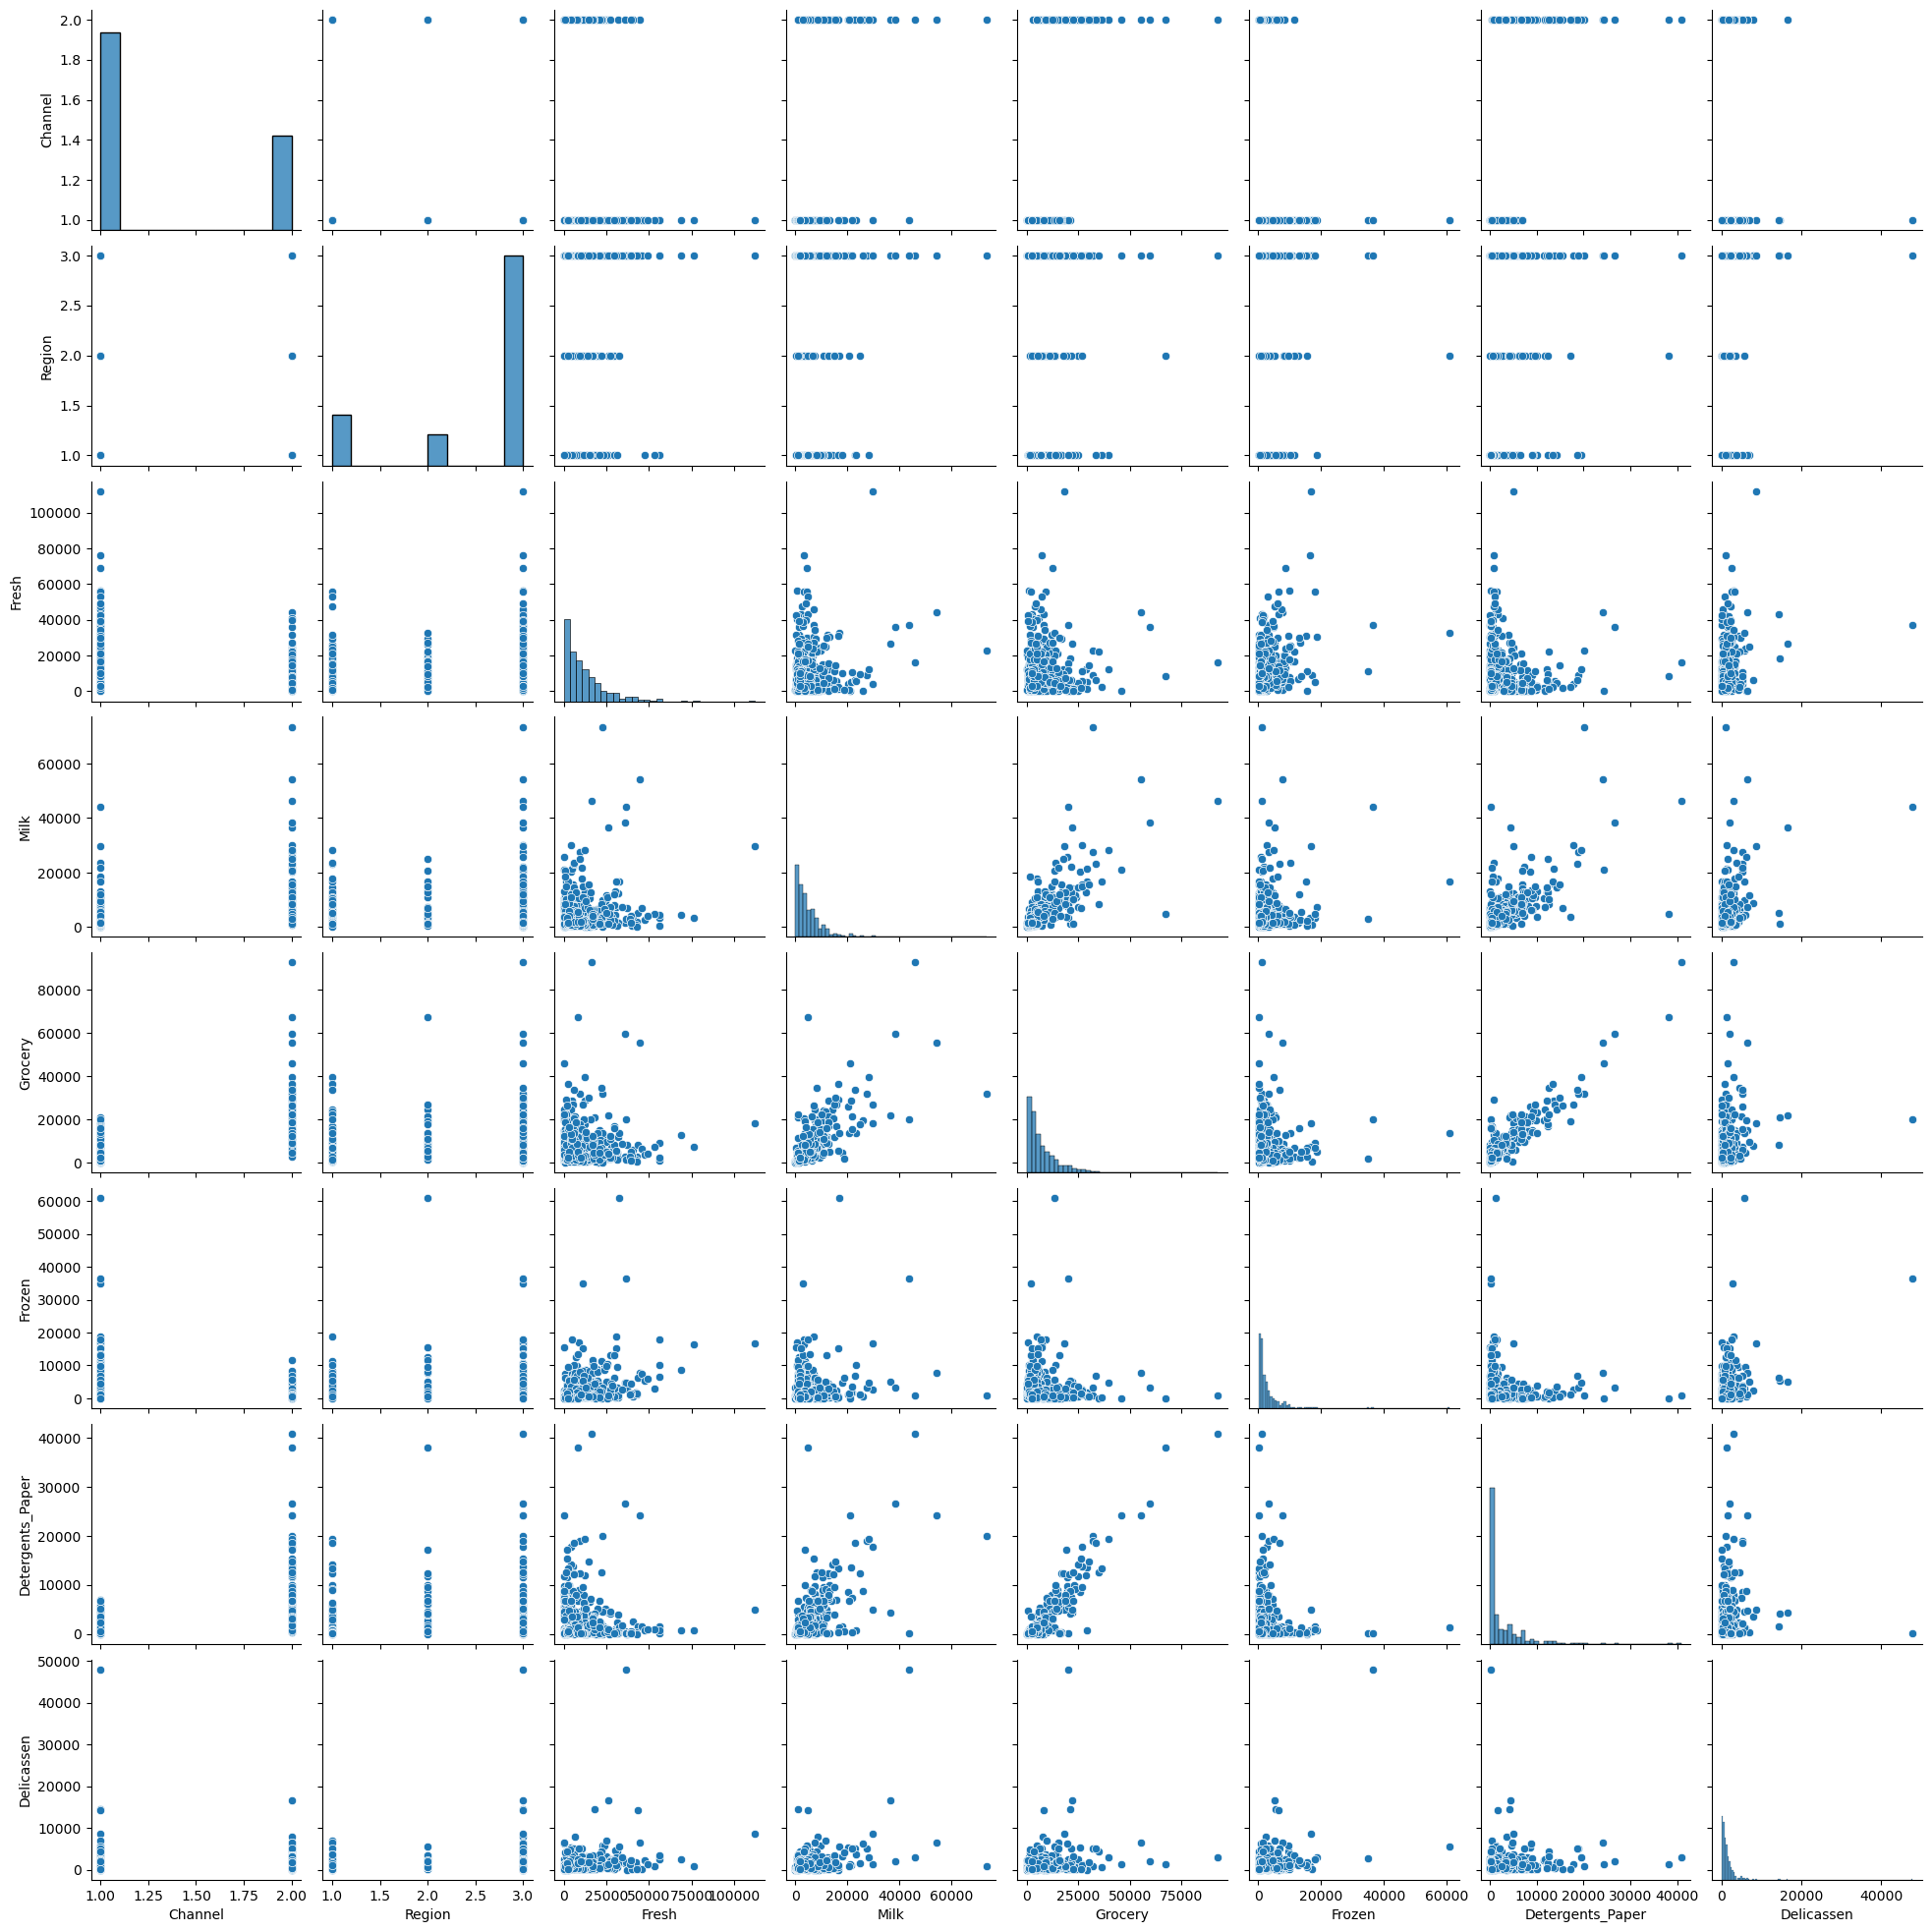

In [9]:
# Pairplot showing relationships between data columns
sns.pairplot(data)

While there are outliers these should not be erroneous as it is simply a stock of a single store. It could be that there is a store that hasn't sold much product or is nearly out so the data points will be kept in. Also looking at the data it seems that the amount of outliers sub 15 which is less than 1% of the data and will not affect it heavily even if there is an error.

<Axes: >

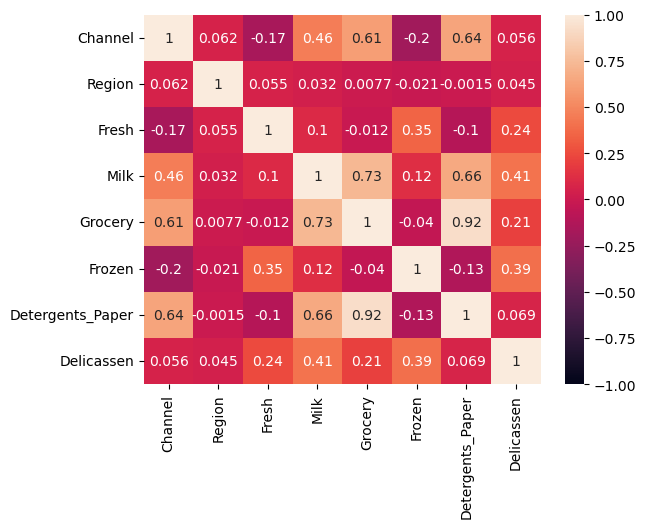

In [10]:
# Correlation heatmap of data
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

Looking at a correlation heatmap we see that there are significant correlations between groceries and milk as well as groceries and detergent paper. There is also smaller correlations between milk and detergent paper, frozen and delicassen, and milk and delicassen.

In [12]:
# Z score normalization
normalizedData = data.copy()
for column in normalizedData.columns:
    if column not in ['Channel', 'Region']:
        normalizedData[column] = (normalizedData[column] - normalizedData[column].mean()) / normalizedData[column].std()
print(normalizedData)

     Channel  Region     Fresh      Milk   Grocery    Frozen  \
0          2       3  0.052873  0.522972 -0.041068 -0.588697   
1          2       3 -0.390857  0.543839  0.170125 -0.269829   
2          2       3 -0.446521  0.408073 -0.028125 -0.137379   
3          1       3  0.099998 -0.623310 -0.392530  0.686363   
4          2       3  0.839284 -0.052337 -0.079266  0.173661   
..       ...     ...       ...       ...       ...       ...   
435        1       3  1.399719  0.847482  0.849793  2.072862   
436        1       3  2.152842 -0.591469 -0.756304  0.296223   
437        2       3  0.200098  1.313176  2.345716 -0.542762   
438        1       3 -0.135230 -0.516947 -0.601829 -0.418964   
439        1       3 -0.728478 -0.555292 -0.572575 -0.619389   

     Detergents_Paper  Delicassen  
0           -0.043519   -0.066264  
1            0.086309    0.089050  
2            0.133080    2.240742  
3           -0.498021    0.093305  
4           -0.231654    1.297870  
..             

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [16]:
from sklearn.cluster import KMeans

In [20]:
X = normalizedData.drop(columns = ['Channel', 'Region'])

In [21]:
def plot_distortion(data,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

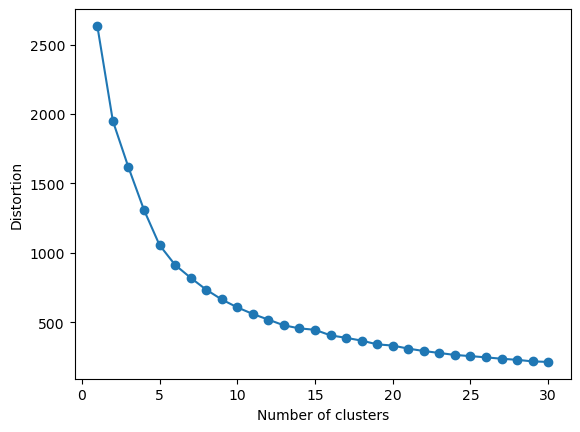

In [29]:
plot_distortion(X,max_clusters=30)

As we can see the distortion decreases as we add more clusters. I am going to choose to go with 6 clusters since even though it does not have a very low distortion a high number of clusters would most likely not give very relevant information on the relationships in the data.

In [56]:
# Fit the model
km = KMeans(n_clusters=6, # how many clusters we expected 
            n_init=15, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)
X['Clusters'] = y_km + 1

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [97]:
def plot_clusters(X,y_res, labels, p, axs):
    for cluster in set(y_res):
        x = X.loc[X['Clusters']==cluster][labels[0]]
        y = X.loc[X['Clusters']==cluster][labels[1]]
        
        axs[p[0], p[1]].scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    axs[p[0], p[1]].legend()
    axs[p[0], p[1]].grid()
    axs[p[0], p[1]].set_title(labels[0] + " vs " + labels[1])

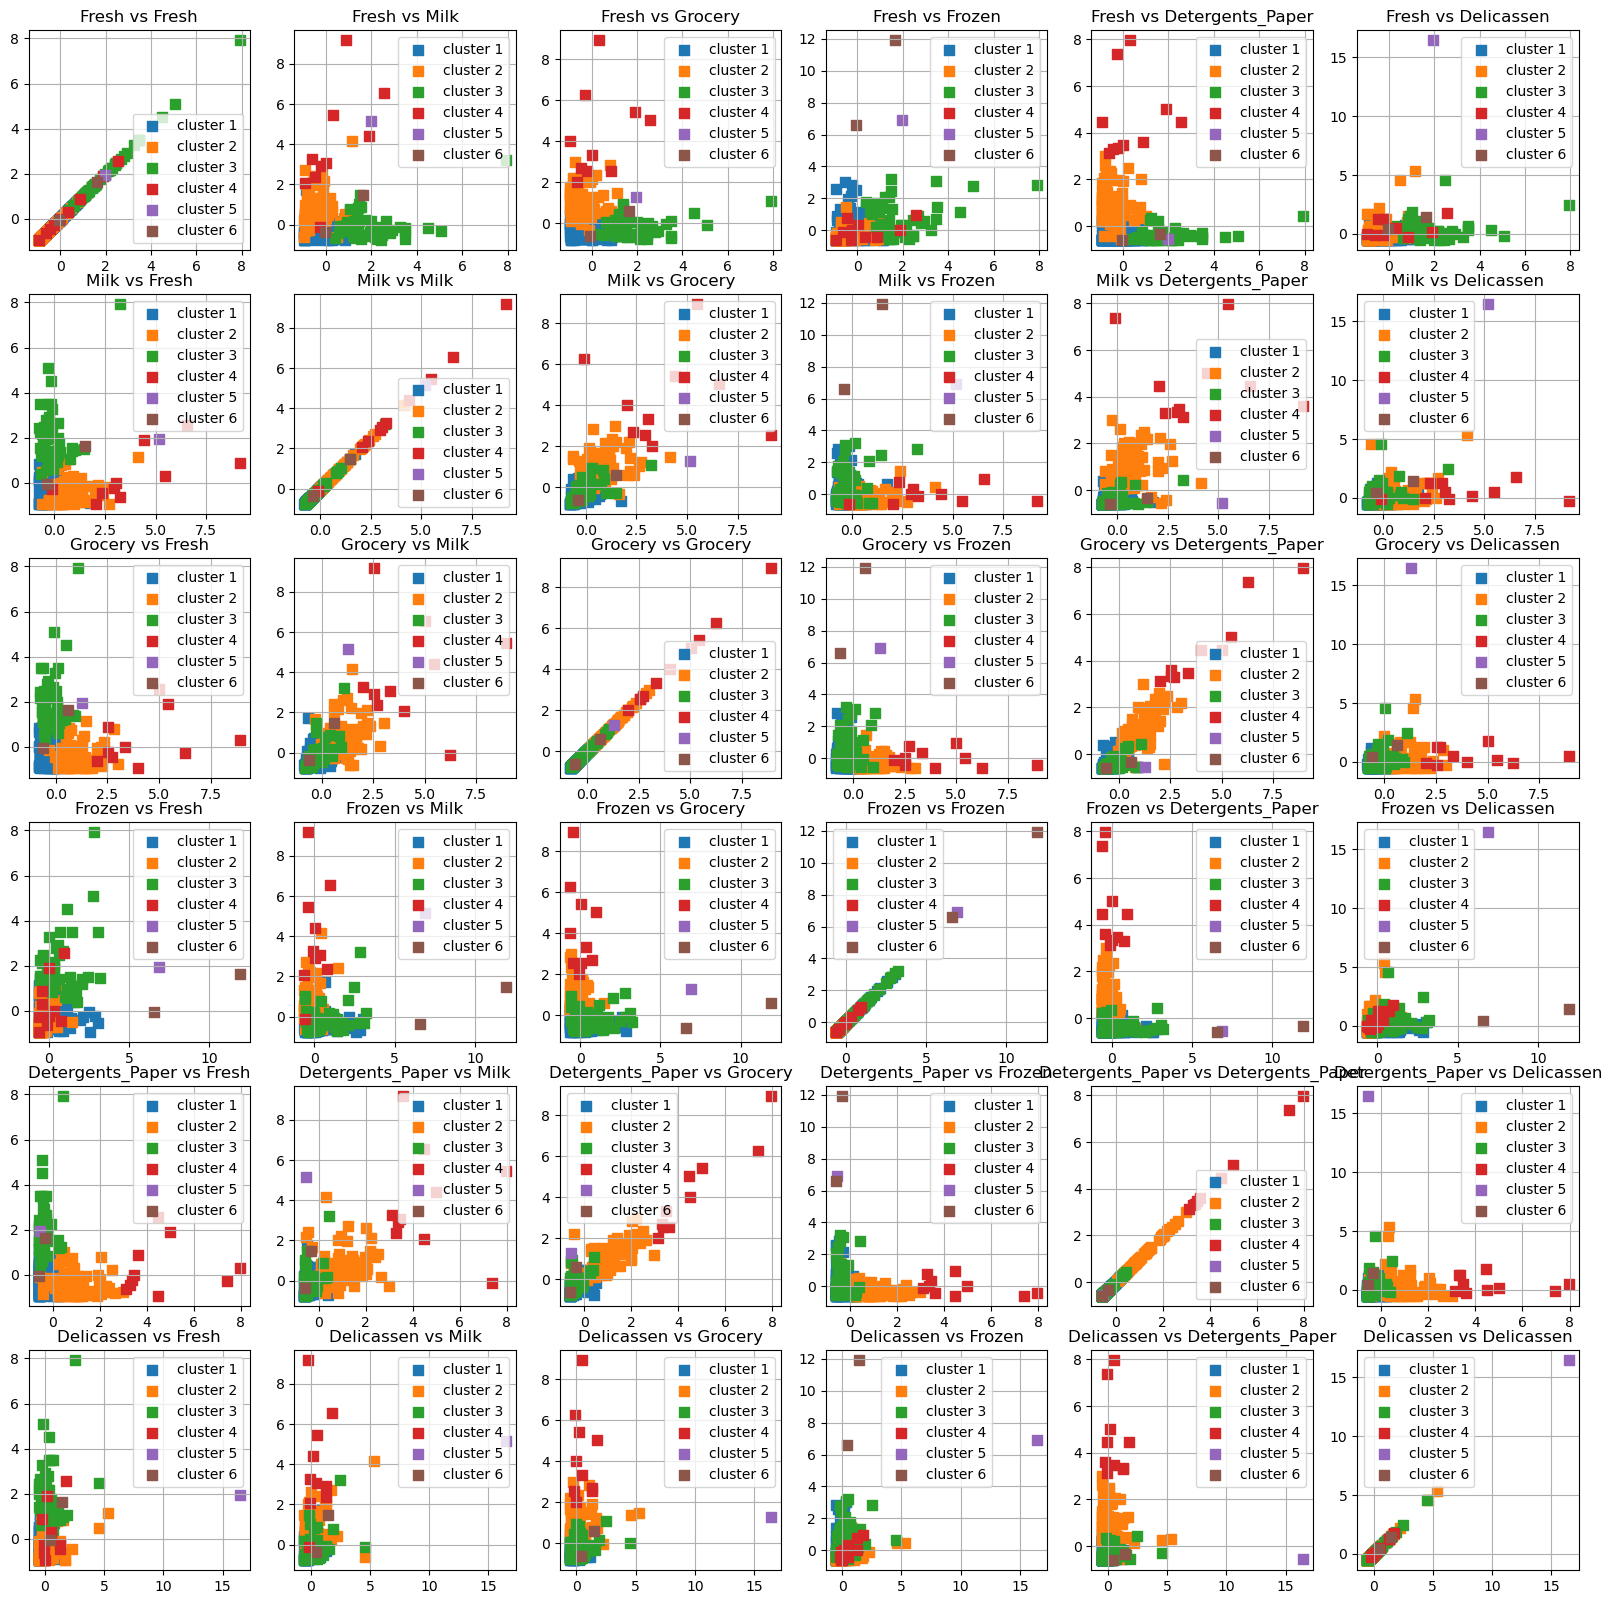

In [157]:
# plot clustering result
fig, axs = plt.subplots(len(X.columns)-1,len(X.columns)-1, figsize=(20, 20))
Xshort = X.drop(columns = 'Clusters')
for x in Xshort.columns:
    for y in Xshort.columns:
        plot_clusters(X, X['Clusters'], [x, y], [np.where(X.columns.values==x)[0][0], np.where(X.columns.values==y)[0][0]], axs)


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [135]:
from sklearn.cluster import AgglomerativeClustering

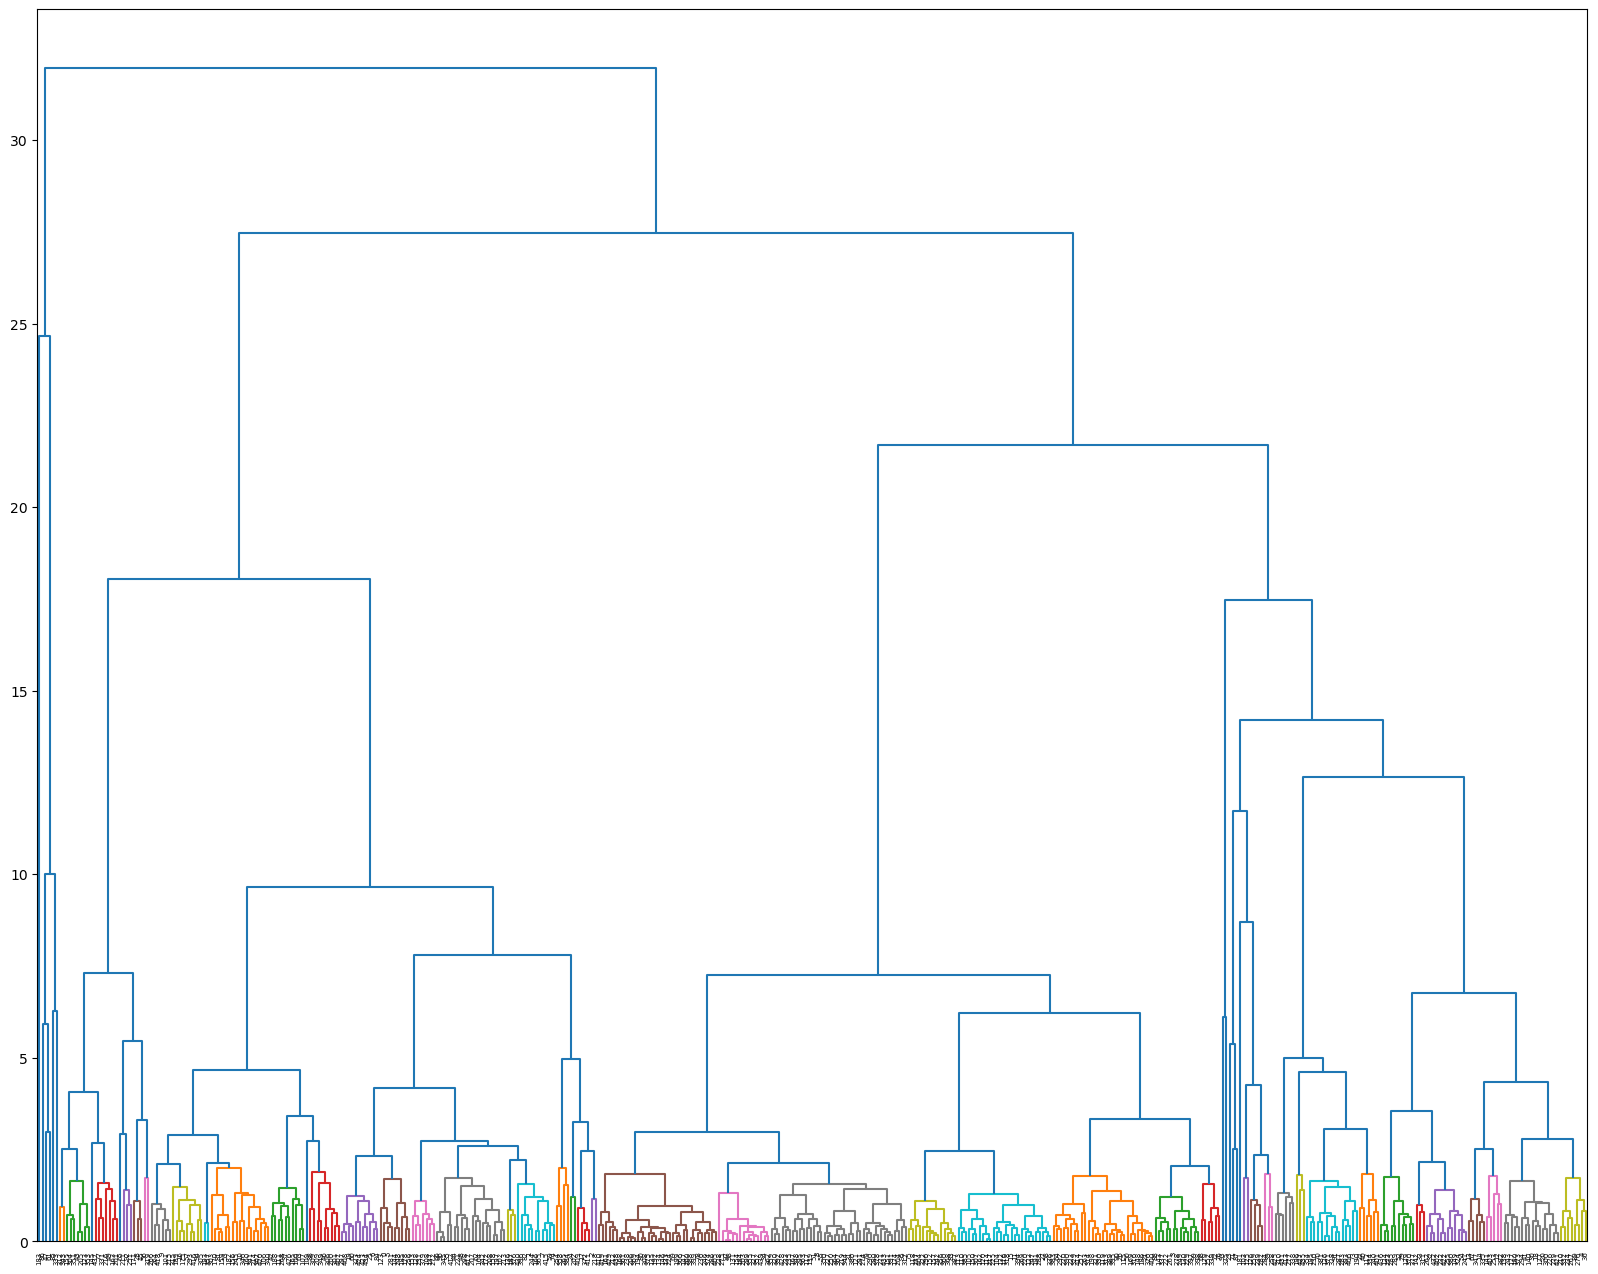

In [154]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

linkage_matrix = linkage(Xshort, method='ward')
plt.figure(figsize=(20,16))
dendro = dendrogram(linkage_matrix, color_threshold=2)
plt.show()

In [162]:
nclusters = len(set(dendro['color_list']))

{'C4', 'C9', 'C3', 'C7', 'C0', 'C6', 'C1', 'C2', 'C5', 'C8'}
10


In [158]:
hierarchy_model = AgglomerativeClustering(n_clusters=nclusters, linkage='ward')
y_hier = hierarchy_model.fit_predict(Xshort)

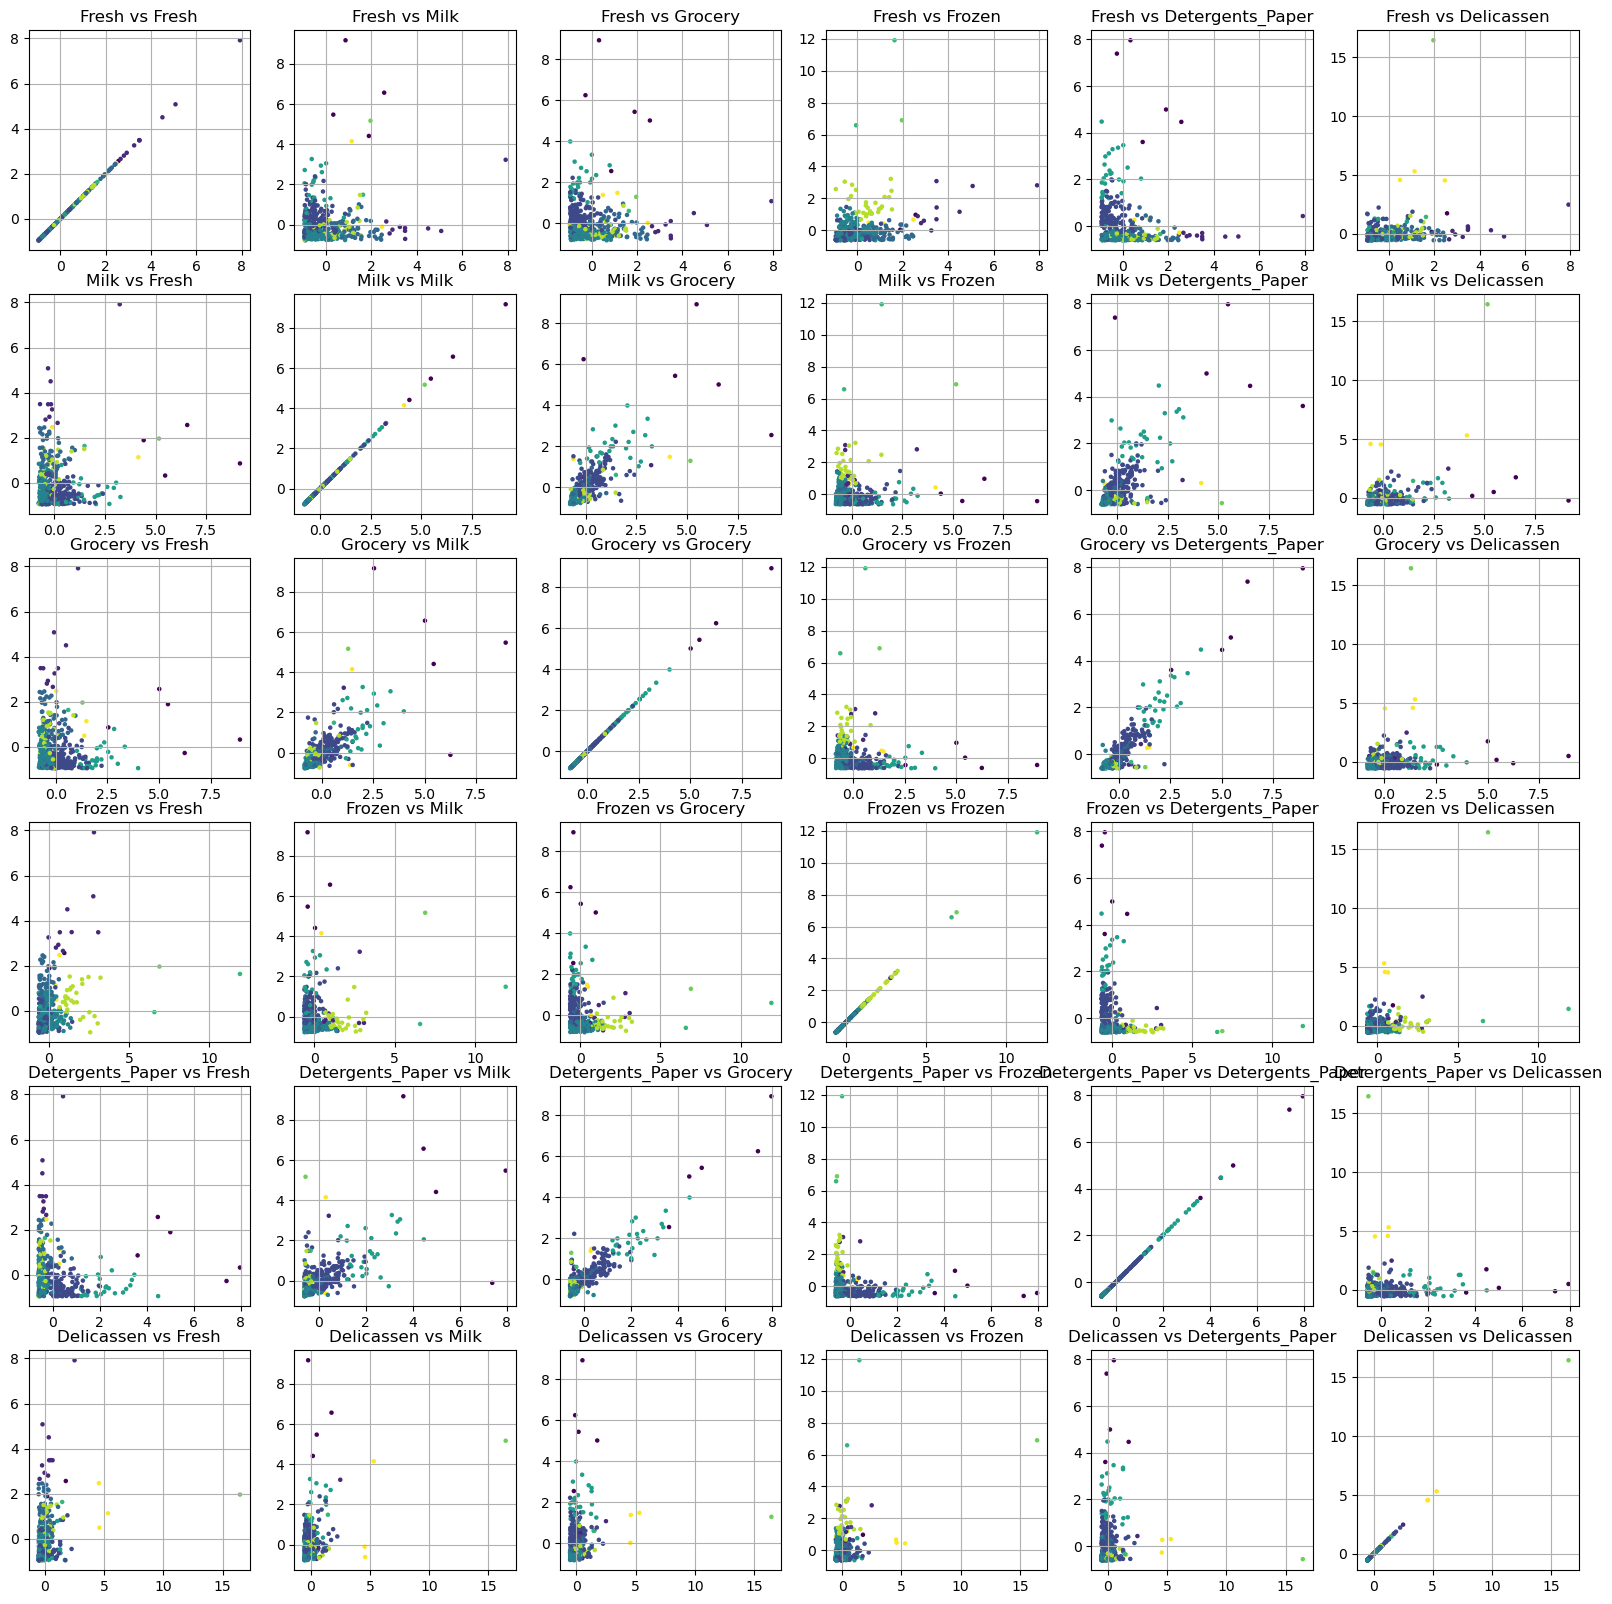

In [161]:
fig, axs = plt.subplots(len(X.columns)-1,len(X.columns)-1, figsize=(20, 20))
for x in Xshort.columns:
    for y in Xshort.columns:
        axs[np.where(X.columns.values==x)[0][0], np.where(X.columns.values==y)[0][0]].scatter(X[x], X[y], c=y_hier, s=5)
        axs[np.where(X.columns.values==x)[0][0], np.where(X.columns.values==y)[0][0]].grid()
        axs[np.where(X.columns.values==x)[0][0], np.where(X.columns.values==y)[0][0]].set_title(x + " vs " + y)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [102]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=None)

X_pca = pca.fit(X.drop(columns = 'Clusters'))

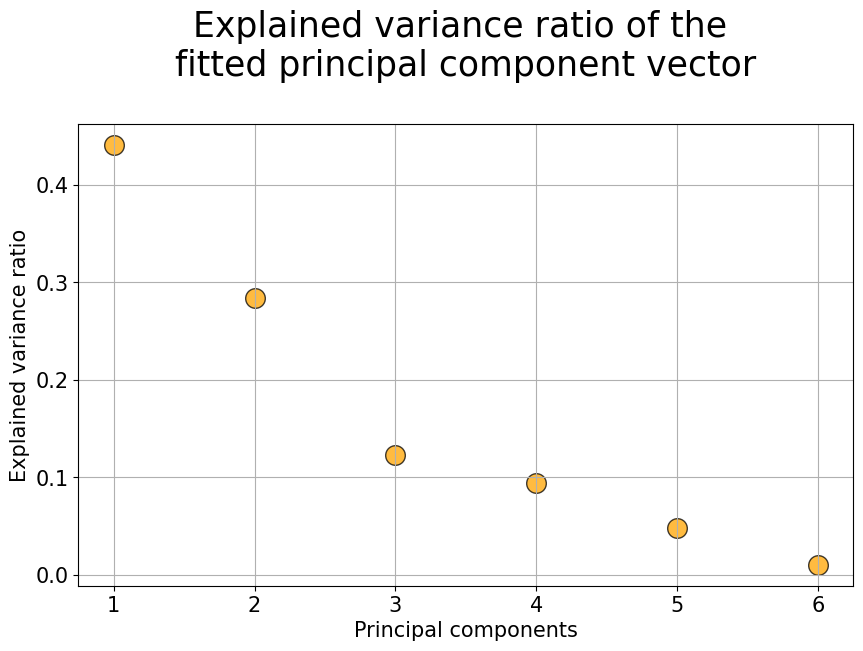

In [110]:
# Code taken from pca walkthrough
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            y=X_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [111]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

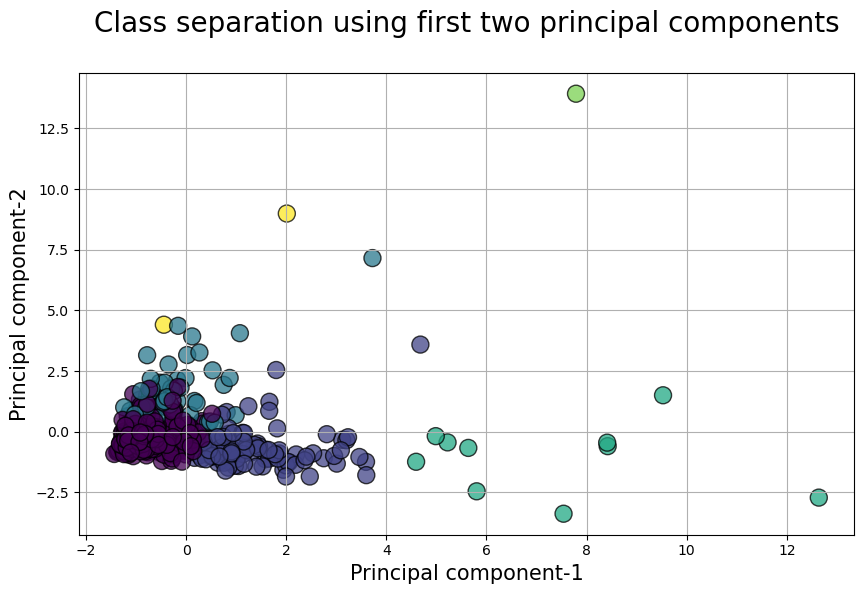

In [114]:
# Code taken from pca walkthrough
X_trans = pca.transform(X.drop(columns = 'Clusters'))
X_trans = pd.DataFrame(data=X_trans)

plt.figure(figsize=(10,6))
plt.scatter(X_trans[0],X_trans[1], c=X['Clusters'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [119]:
pca.components_

array([[ 0.04288396,  0.54511832,  0.57925635,  0.05118859,  0.5486402 ,
         0.24868198],
       [ 0.52793212,  0.08316765, -0.14608818,  0.61127764, -0.25523316,
         0.50420705],
       [-0.81225657,  0.06038798, -0.10838401,  0.17838615, -0.13619225,
         0.52390412],
       [-0.23668559, -0.08718991,  0.10598745,  0.76868266,  0.17174406,
        -0.55206472],
       [-0.04868278,  0.82657929, -0.31499943, -0.02793224, -0.33964012,
        -0.31470051],
       [-0.03602539, -0.03804019,  0.72174458, -0.01563715, -0.68589373,
        -0.07513412]])

In [127]:
# I add all the components up and multiply them by the corresponding explained variance ratio to see how much each variable contributes to the total model
a = pca.components_
b = pca.explained_variance_ratio_
a[0]
totals = [0, 0, 0, 0, 0, 0]
for i in range(len(a)):
    for j in range(len(a[i])):
        totals[j] += abs(a[i][j]*b[i])
print(totals)

[0.2938335119053132, 0.31929927398080465, 0.3427069345229425, 0.2917425317510926, 0.37058695587369095, 0.38496407059740273]


From the above code we see that all the variables have similar contributions to the variance within the model. The two most important variables to the model are Detergents_Paper and Delicassen. The least important variable is Fresh.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Using the elbow method I came to choose 6 clusters from the k means model and from the hierarchical model using dendrogram it chose 10 clusters showing a difference in how the models group the variables.

2. Looking at the scatter plots for both models leads to me seeing that many of these clusters are most likely just clustering outliers. This leads to clusters that are irrelevant to the interpretation of the data.

3. Using PCA I have come to the conclusion that the most important variables to the model are detergents_paper and delicassen as they have the most cumulative contributions to the principle components. The least important variables is Fresh. All variables are fairly close to each other despite this.

4. In the fresh vs detergents_paper plot for the k means model the model has seemed to cluster the stores into places that bought lots of fresh products, stores that bought lots of detergents paper products and stores did not buy very much of either. Basically it is dividing its customers into stores that most likely stock certain products. This may be something like grocers, cleaning supplies stores and convenience stores. 